Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost
import lightgbm

In [2]:
df= pd.read_csv('newfood.csv')
df.head()

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs,time
0,breadPudding,dessert,nm,3,0,1,0,junior,1.0,18
1,Beef Shawarma,bites,nm,2,1,0,1,junior,0.5,14
2,SweetandsourPork,main,nm,1,1,0,0,senior,4.0,25
3,chickenBiriyani,main,lg,1,1,0,1,junior,1.5,40
4,Vegetable Chopsuey Rice,main,lg,7,0,1,0,senior,2.5,15


In [3]:
df.shape

(354, 10)

In [4]:
df.isna().sum()

name               0
type               0
size               0
amount             0
non_veg            0
veg                0
queued_orders      0
chef_experience    0
workedHrs          0
time               0
dtype: int64

Heat Map

In [5]:
import seaborn as sns;

C:\Users\YehanNK\AppData\Local\Temp\ipykernel_8392\3654011136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


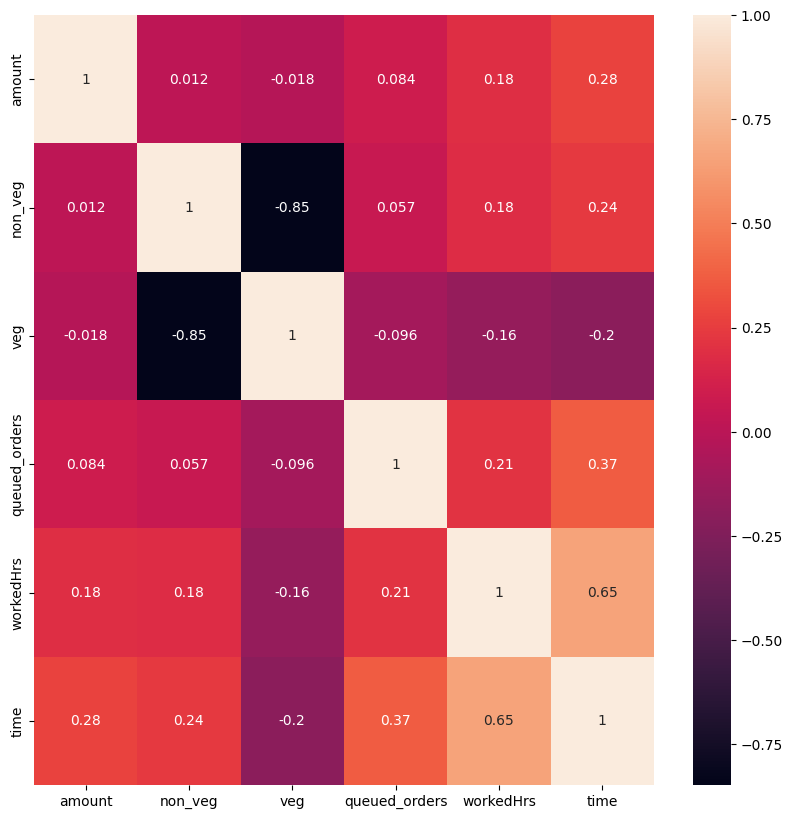

In [6]:
cor=df.corr()
cols=cor.index
plt.figure(figsize=(10,10))
f=sns.heatmap(df[cols].corr(),annot=True)

Removing any Duplicates

In [7]:
df1=df.drop_duplicates()
df1

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs,time
0,breadPudding,dessert,nm,3,0,1,0,junior,1.0,18
1,Beef Shawarma,bites,nm,2,1,0,1,junior,0.5,14
2,SweetandsourPork,main,nm,1,1,0,0,senior,4.0,25
3,chickenBiriyani,main,lg,1,1,0,1,junior,1.5,40
4,Vegetable Chopsuey Rice,main,lg,7,0,1,0,senior,2.5,15
...,...,...,...,...,...,...,...,...,...,...
349,pepperPork,main,lg,3,0,1,8,junior,2.0,40
350,pepperPork,main,lg,2,0,1,2,senior,2.0,24
351,Mutton Masala,main,nm,2,1,0,2,junior,2.0,25
352,Mutton Masala,main,xl,1,1,0,3,senior,4.0,35


In [8]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353    False
Length: 350, dtype: bool

In [9]:
df.dtypes

name                object
type                object
size                object
amount               int64
non_veg              int64
veg                  int64
queued_orders        int64
chef_experience     object
workedHrs          float64
time                 int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [11]:
foodNames = df['name']

In [12]:
df4=pd.DataFrame(foodNames)

In [13]:
df4

,name
0,breadPudding
1,Beef Shawarma
2,SweetandsourPork
3,chickenBiriyani
4,Vegetable Chopsuey Rice
...,...
349,pepperPork
350,pepperPork
351,Mutton Masala
352,Mutton Masala


In [14]:
# df2.columns

Convert the Strings into characters

In [15]:
# change all data type using LabelEncode

df2=df1
pd.options.mode.chained_assignment = None
label_encoders = {}
categorical_columns = df2.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    if(df2[column].dtype=='object'):
        df4["id"]= df2["name"] 
        df2[column] = label_encoders[column].fit_transform(df2[column])


In [16]:
df2.columns.values[0]

'name'

In [17]:
df4

,name,id
0,breadPudding,17.0
1,Beef Shawarma,2.0
2,SweetandsourPork,11.0
3,chickenBiriyani,20.0
4,Vegetable Chopsuey Rice,12.0
...,...,...
349,pepperPork,52.0
350,pepperPork,52.0
351,Mutton Masala,7.0
352,Mutton Masala,7.0


In [18]:
# pd.set_option('display.max_rows', None)

In [19]:


test=df4.drop_duplicates().dropna()




In [20]:
import json

data = test.to_json('./export.json', orient='records')
data


In [21]:
df2

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs,time
0,17,3,1,3,0,1,0,0,1.0,18
1,2,1,1,2,1,0,1,0,0.5,14
2,11,4,1,1,1,0,0,1,4.0,25
3,20,4,0,1,1,0,1,0,1.5,40
4,12,4,0,7,0,1,0,1,2.5,15
...,...,...,...,...,...,...,...,...,...,...
349,52,4,0,3,0,1,8,0,2.0,40
350,52,4,0,2,0,1,2,1,2.0,24
351,7,4,1,2,1,0,2,0,2.0,25
352,7,4,2,1,1,0,3,1,4.0,35


In [22]:
df2.dtypes

name                 int32
type                 int32
size                 int32
amount               int64
non_veg              int64
veg                  int64
queued_orders        int64
chef_experience      int32
workedHrs          float64
time                 int64
dtype: object

In [23]:
features= df2.drop("time",axis=1)
labels=df2["time"] # store the labels

In [24]:
features.head(10)

,name,type,size,amount,non_veg,veg,queued_orders,chef_experience,workedHrs
0,17,3,1,3,0,1,0,0,1.0
1,2,1,1,2,1,0,1,0,0.5
2,11,4,1,1,1,0,0,1,4.0
3,20,4,0,1,1,0,1,0,1.5
4,12,4,0,7,0,1,0,1,2.5
5,68,1,1,3,0,1,0,0,0.0
6,43,4,1,1,1,4,0,0,2.0
7,14,1,1,4,1,0,6,1,1.0
8,31,0,0,4,0,1,4,0,2.0
9,25,1,2,1,0,1,0,1,2.5


Training data

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
# #break the data into training and Testing
# x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=135678)-2
#break the data into training and Testing
# x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=135791113)- best

# x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=1234) -best with grid search

# x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=135678) 
x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=99998888 )
#99998888 
#410000
#77775555

# x_train , x_test , y_train ,y_test = train_test_split(features,labels,test_size=0.2,random_state=1357911131)

In [27]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(280, 9) (70, 9) (280,) (70,)


Models

In [28]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.neural_network import  MLPRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [29]:
linear_reg =  LinearRegression()
rf = RandomForestRegressor(n_estimators=50, 
                               criterion='squared_error', 
                               random_state=34, 
                               n_jobs=-5)
decisiontree = DecisionTreeRegressor(random_state=123)
knr= KNeighborsRegressor()
xgb=XGBRegressor()
mlp=MLPRegressor()
lightgbm=LGBMRegressor()
cb=CatBoostRegressor(verbose=0)

In [30]:
decisiontree.fit(x_train,y_train)
rf.fit(x_train,y_train)
linear_reg.fit(x_train,y_train)
knr.fit(x_train,y_train)
xgb.fit(x_train,y_train)
mlp.fit(x_train,y_train)
lightgbm.fit(x_train,y_train)
cb.fit(x_train,y_train)

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [31]:
Y_pred_dt = decisiontree.predict(x_test)
Y_pred_rf = rf.predict(x_test)
Y_pred_lr = linear_reg.predict(x_test)
Y_pred_xgb = xgb.predict(x_test)
Y_pred_knr = knr.predict(x_test)
Y_pred_mpl = mlp.predict(x_test)
Y_pred_lg = lightgbm.predict(x_test)
Y_pred_cb = cb.predict(x_test)

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [33]:
print("Random Forest :",r2_score(y_test,Y_pred_rf)*100)
print("Linear Regression :",r2_score(y_test,Y_pred_lr)*100)
print("Decision Tree :",r2_score(y_test,Y_pred_dt)*100)
print("XGBoost :",r2_score(y_test,Y_pred_xgb)*100)
print("KNR :",r2_score(y_test,Y_pred_knr)*100)
print("MPL :",r2_score(y_test,Y_pred_mpl)*100)
print("lgbm :",r2_score(y_test,Y_pred_lg)*100)
print("catboost :",r2_score(y_test,Y_pred_cb)*100)

Random Forest : 70.97620717401858
Linear Regression : 68.88514156201684
Decision Tree : 58.75812011597711
XGBoost : 67.96574152647712
KNR : 59.42828441689745
MPL : 68.46863740471937
lgbm : 72.57147846745315
catboost : 75.04729498792265


In [34]:
print("Random Forest :",mean_squared_error(y_test,Y_pred_rf,squared=False))
print("Linear Regression :",mean_squared_error(y_test,Y_pred_lr,squared=False))
print("Decision Tree :",mean_squared_error(y_test,Y_pred_dt,squared=False))
print("XGBoost :", mean_squared_error(y_test,Y_pred_xgb,squared=False))
print("KNR :",mean_squared_error(y_test,Y_pred_knr,squared=False))
print("MPL :",mean_squared_error(y_test,Y_pred_mpl,squared=False))
print("lgbm :",mean_squared_error(y_test,Y_pred_lg,squared=False))
print("cat boost :",mean_squared_error(y_test,Y_pred_cb,squared=False))

Random Forest : 7.987463195533361
Linear Regression : 8.270194092098123
Decision Tree : 9.521404458226888
XGBoost : 8.391490844430367
KNR : 9.44372807740672
MPL : 8.32536258126153
lgbm : 7.764848501012332
cat boost : 7.406117595782448


Proceed with the top 4 algorithms for Hyperparemeter Tuning

In [35]:
# x1 = cb.predict([[1,2,1,3,1,0,2,2]])
# x1[0]

Algorithm comparison Before Grid Search


In [36]:

li = [cb,rf,linear_reg,mlp,knr,decisiontree]
d = {}
for i in li:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(x_test,y_test)*100})

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


<catboost.core.CatBoostRegressor object at 0x000001B0D2E8EA70> : 75.04729498792265


c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


RandomForestRegressor(n_estimators=50, n_jobs=-5, random_state=34) : 70.97620717401858
LinearRegression() : 68.88514156201684
MLPRegressor() : 68.01392128582083
KNeighborsRegressor() : 59.42828441689745
DecisionTreeRegressor(random_state=123) : 58.75812011597711


c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


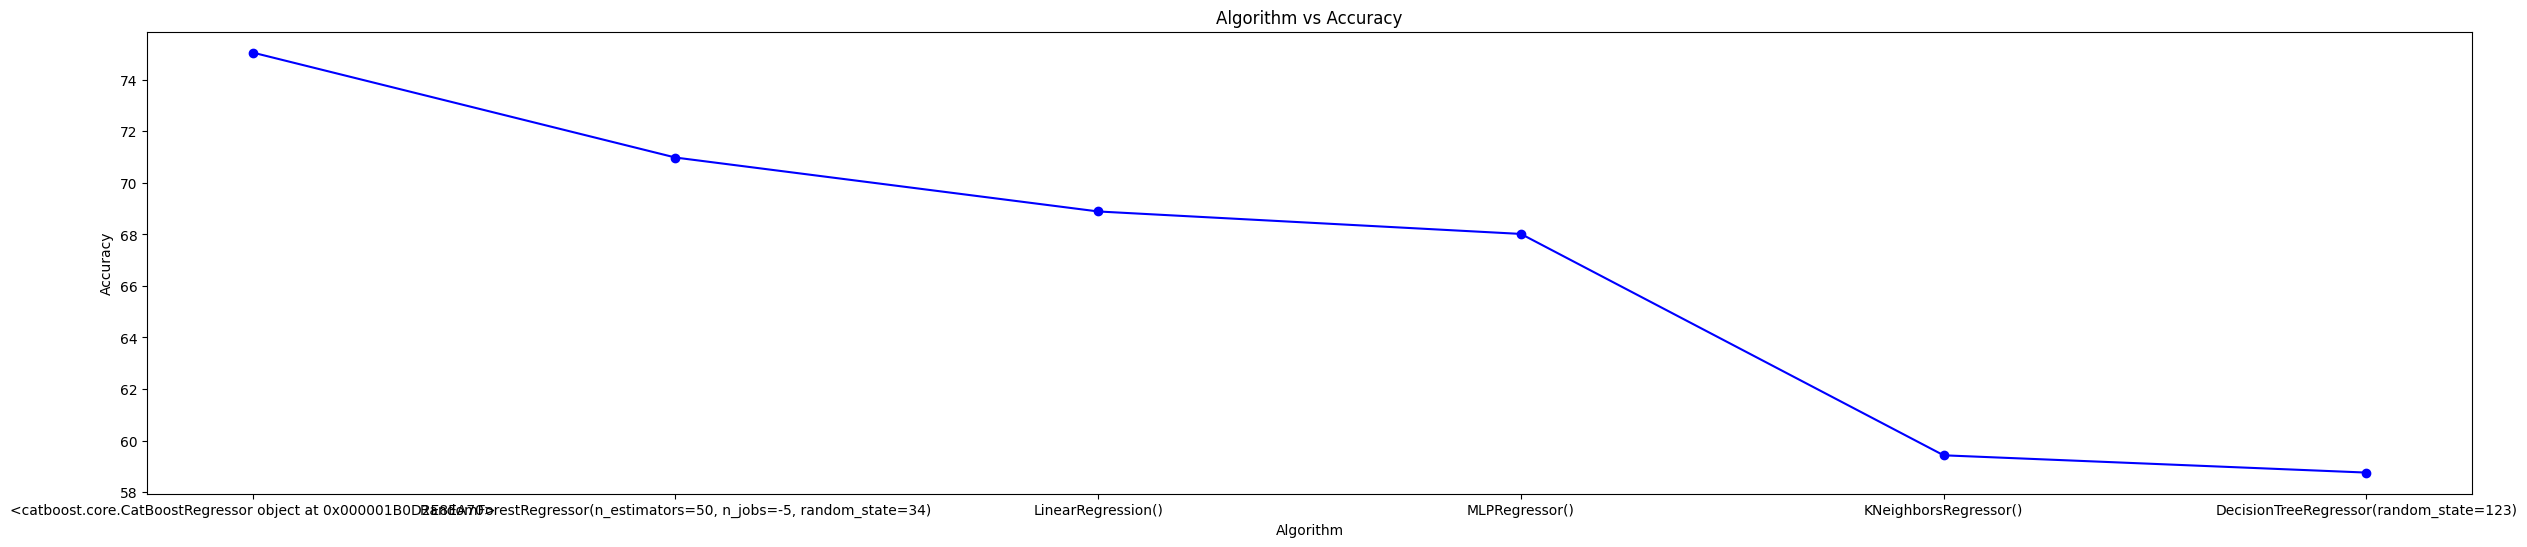

In [37]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(list(d.keys()),list(d.values()),marker='o',color='blue')
plt.show()

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV

In [39]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [40]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
    
}

In [41]:
grid = GridSearchCV(estimator=xgb, param_grid = parameters, cv = cv, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constrai...'',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [42]:
gridcb = GridSearchCV(estimator=cb, param_grid = parameters, cv = cv, n_jobs=-1)
gridcb.fit(x_train, y_train)

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=<catboost.core.CatBoostRegressor object at 0x000001B0D2E8EA70>,
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [43]:
gridRand = GridSearchCV(estimator=rf, param_grid = parameters, cv = cv, n_jobs=-1)
gridRand.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=RandomForestRegressor(n_estimators=50, n_jobs=-5,
                                             random_state=34),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [44]:
gridLGBM = GridSearchCV(estimator=lightgbm, param_grid = parameters, cv = cv, n_jobs=-1)
gridLGBM.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [45]:
y_predict_random=grid.predict(x_test)
y_predict_rand_cb=gridcb.predict(x_test)
y_predict_random_forest=gridRand.predict(x_test)
y_predict_lightBoost=gridLGBM.predict(x_test)

c:\Users\YehanNK\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Before and After Grid search for the top 4 selected models

In [46]:
print("Before Grid Search xg boost:",r2_score(y_test,Y_pred_xgb)*100)
print("After  Grid Search xg boost:",r2_score(y_test,y_predict_random)*100)

print("Before Grid Search cat boost:",r2_score(y_test,Y_pred_cb)*100)
print("After  Grid Search ca:",r2_score(y_test,y_predict_rand_cb)*100)

print("Before Grid Search rf:",r2_score(y_test,Y_pred_rf)*100)
print("After  Grid Search fr:",r2_score(y_test,y_predict_random_forest)*100)

print("Before Grid Search lgm:",r2_score(y_test,Y_pred_lg)*100)
print("After  Grid Search lgb:",r2_score(y_test,y_predict_lightBoost)*100)

Before Grid Search xg boost: 67.96574152647712
After  Grid Search xg boost: 79.48195615679164
Before Grid Search cat boost: 75.04729498792265
After  Grid Search ca: 78.05002036885968
Before Grid Search rf: 70.97620717401858
After  Grid Search fr: 68.28061874690188
Before Grid Search lgm: 72.57147846745315
After  Grid Search lgb: 77.17531214561127


In [47]:
y_train_predict = grid.predict(x_train)

In [48]:
print("XGBoost :", mean_squared_error(y_test,y_predict_random, squared=False))
print(mean_squared_error(y_train, y_train_predict, squared=False))

XGBoost : 6.715831081415826
2.4253837147302213


In [49]:
data=[[1,2,1,3,1,0,2,2]]
num= np.array(data)
num

array([[1, 2, 1, 3, 1, 0, 2, 2]])

In [50]:
# x1 = grid.predict(num)
# x1[0]

In [51]:
# x2=xgb.predict(num)
# x2[0]

In [52]:
print("Before Grid Search:",r2_score(y_test,Y_pred_xgb)*100)
print("After  Grid Search:",r2_score(y_test,y_predict_random)*100)

Before Grid Search: 67.96574152647712
After  Grid Search: 79.48195615679164


In [53]:
print('Best Score: %s' % grid.best_score_)

Best Score: 0.6350737339384727


Checking for Overfitting and Under Fitting

In [58]:
print (f'Train Accuracy - : {grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.967
Test Accuracy - : 0.795


In [55]:
import pickle

In [56]:
pickle.dump(grid,open('file2.pkl','wb'))